## 以狀態值函數大者為行動依據

In [36]:
# 載入相關套件
import numpy as np
import random

In [37]:
# 參數設定
NODE_COUNT = 15      # 節點數
NORMAL_REWARD = -0.2 # 每走一步扣分 0.2

In [38]:
# 環境類別
class Environment():
    # 初始化
    def __init__(self):
        # 儲存狀態值函數，索引值[0]:不用，從1開始
        self.state_value = np.full((NODE_COUNT+1), 0.0)
        self.state_value[1]=-1
        self.state_value[NODE_COUNT]=1

        # 更新次數，索引值[0]:不用，從1開始
        self.state_value_count = np.full((NODE_COUNT+1), 0)
        self.state_value_count[1]=1
        self.state_value_count[NODE_COUNT]=1
        
    # 初始化
    def reset(self):
        self.poistion = int((1+NODE_COUNT) / 2)  # 玩家一開始站中間位置
        self.trajectory=[] # 行動軌跡

    def get_states(self):
        # 狀態空間(State Space)，共有5個位置
        return [i for i in range(1, 6)]

    def get_actions(self):        
        return [-1, 1] # 行動空間(Action Space)

    def is_done(self): # 判斷比賽回合是否結束
        # 是否走到左右端點
        if self.poistion == 1 or self.poistion == NODE_COUNT:
            self.trajectory.append(self.poistion)   
            return True
        else:
            return False
    
    # 步驟
    def step(self, action):
        # 是否回合已結束
        if self.is_done():
            # 不應該有機會執行到這裡
            raise Exception("Game is over")
            
        self.trajectory.append(self.poistion)        
        self.poistion += action
        if self.poistion == 1:
            reward = -1
        elif self.poistion == NODE_COUNT:
            reward = 1
        else:    
            reward = NORMAL_REWARD

        return self.poistion, reward

    def update_state_value(self, final_value):
        # 倒推，更新狀態值函數
        for i in range(len(self.trajectory)-1, -1, -1):
            final_value += NORMAL_REWARD
            self.state_value[self.trajectory[i]] += final_value
            self.state_value_count[self.trajectory[i]] += 1
                
    # 取得狀態值函數期望值
    def get_observation(self):
        mean1 = self.state_value / self.state_value_count
        return mean1

In [39]:
# 代理人類別
class Agent():
    # 初始化
    def __init__(self):
        pass
        
    def action(self, env):
        # 取得狀態值函數期望值
        state_value = env.get_observation()
        
        # 以左/右節點狀態值函數大者為行動依據，如果兩個狀態值一樣大，隨機選擇一個
        if state_value[env.poistion-1] > state_value[env.poistion+1]:  
            return -1            
        if state_value[env.poistion-1] < state_value[env.poistion+1]:  
            return 1            
        else:  
            return random.choice([-1, 1])            

In [40]:
# 建立實驗，含環境、代理人物件
env = Environment()
agent = Agent()

# 進行實驗
total_reward_list = []
for _ in range(10):
    env.reset()  # 重置
    total_reward=0  # 累計報酬
    while not env.is_done():
        # 採取行動
        action = agent.action(env)
        
        # 更新下一步
        state, reward = env.step(action)
        #print(state, reward)
        # 計算累計報酬
        total_reward += reward
    
    print('trajectory', env.trajectory)
    env.update_state_value(total_reward)
    total_reward_list.append(round(total_reward, 2))
    
# 顯示累計報酬
print(f"累計報酬: {total_reward_list}")

trajectory [8, 7, 8, 7, 6, 5, 6, 5, 4, 3, 2, 3, 4, 5, 4, 5, 6, 5, 6, 7, 6, 5, 6, 7, 6, 5, 4, 5, 6, 7, 8, 7, 6, 7, 8, 7, 6, 7, 6, 5, 6, 5, 6, 7, 8, 9, 10, 9, 8, 9, 8, 9, 8, 7, 6, 5, 6, 7, 6, 5, 6, 5, 6, 7, 6, 5, 4, 5, 6, 5, 4, 3, 4, 3, 2, 1]
trajectory [8, 9, 10, 11, 12, 11, 12, 11, 10, 11, 10, 9, 10, 11, 10, 11, 12, 13, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
trajectory [8, 9, 10, 11, 12, 13, 14, 15]
累計報酬: [-15.8, -3.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2]


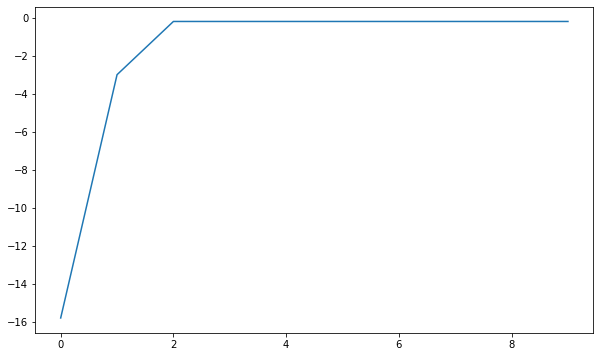

In [41]:
# 繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(total_reward_list)